## Weak law of large numbers
Let $X_1, X_2, \ldots, X_n$ be i.i.d. random variables with finite variance, i.e. $\operatorname{Var}[X] < \infty$, then

$$\frac{1}{n} \sum_{i=1}^n X_i \overset{p}{\rightarrow} \mathbb{E}[X], \text{ as } n \rightarrow \infty $$
More generally, for any $k$th moment, if $\mathbb{E}[X^{k + 1}] < \infty$, then

$$\frac{1}{n} \sum_{i=1}^n X_i^k \overset{p}{\rightarrow} \mathbb{E}[X^k], \text{ as } n \rightarrow \infty $$

Summary: as the size of samples increase towards infinity, sample features approach population corollaries.

In the code that follows we're going to try to better understand this result through simulation. Run the code below to replicate the convergence plot from the slides. 

**Exercises:**

1. Try modifying the simulation by increasing the maximum sample size, the number of simulated sequences, or the underlying population distribution. What do you notice?

2. A bit more difficult: we also mentioned the WLLN applies to higher order moments. What happens if you look at the sample variance rather than the mean?

In [2]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



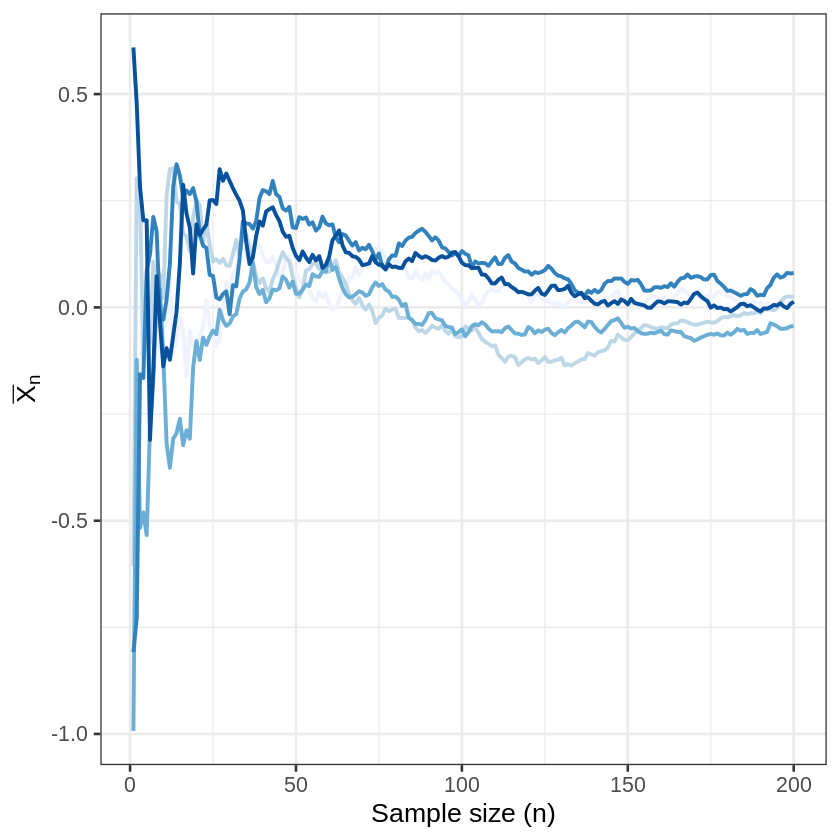

In [22]:
N <- 200     # maximum sample size
SIMS <- 5    # number of simulated convergence sequences

# create simulation grid
df <- expand_grid(
  n = 1:N,
  sim = 1:SIMS
)

# draw values from the normal(0, 1) distribution
df$x <- rnorm(N * SIMS, mean = 0, sd = 1)

# calculate running average
df <- df %>% 
  group_by(sim) %>% 
  mutate(xbar = cumsum(x) / n)

# plot
ggplot(df) +
    aes(n, xbar, color = factor(sim), group = factor(sim)) + 
    geom_line(size = 1.1) +
    theme_bw(base_size = 16) +
    theme(legend.position = 'none') + 
    scale_color_brewer(palette = "Blues") +
    labs(
      x = "Sample size (n)",
      y = expression(bar(X)[n])
    )

## The Central Limit Theorem
Let $X_1, X_2, \ldots, X_n$ be i.i.d. random variables with finite mean, $\mathbb{E}[X] = \mu$, and variance, $\operatorname{Var}[X] = \sigma^2$, then

$$ \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma} \overset{d}{\rightarrow} N(0, 1)$$
or equivalently, 

$$ \bar{X} \overset{d}{\rightarrow} N(\mu, \dfrac{\sigma^2}{n})$$

Summary: as the size of samples increase towards infinity, the distribution of the sample mean is approximately Normal.

In the code that follows we're going to try to better understand this result through simulation. Run the code below to replicate the central limit theorem plot from the slides. 

**Exercises:**

1. Try modifying the simulation by changing the sample sizes, the number of simulations, or the underlying population distribution. What do you notice?


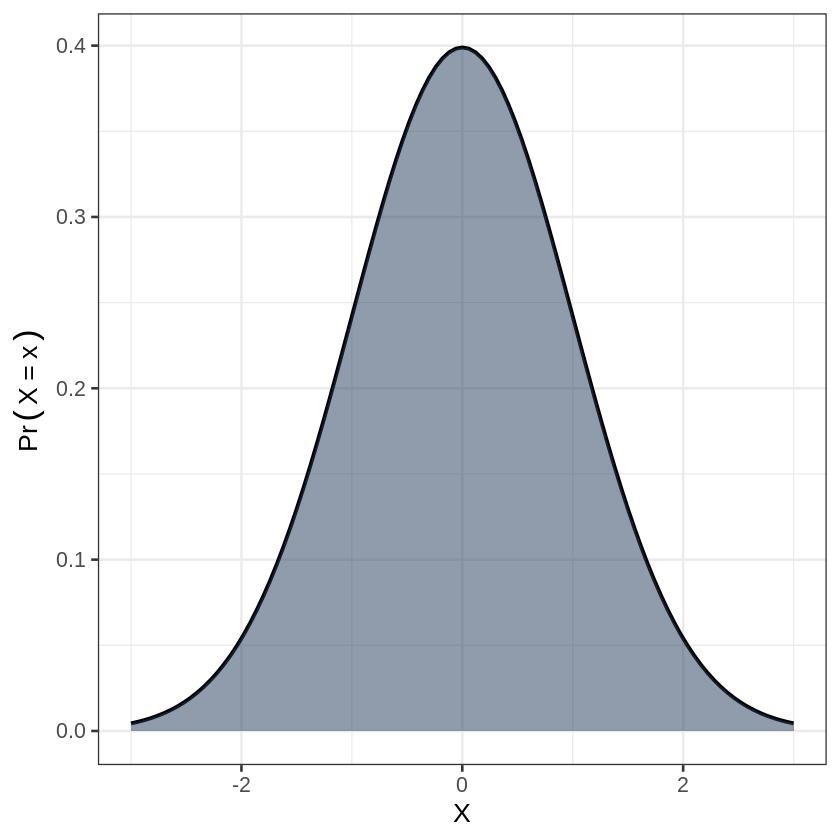

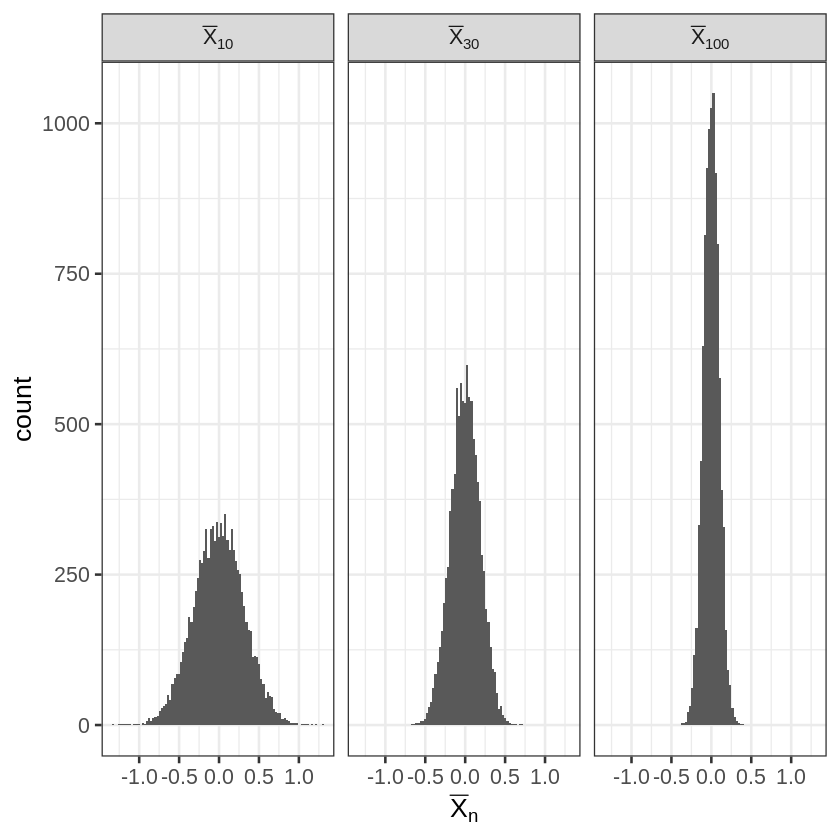

In [23]:


sims <- 10000       # number of simulations
n <- c(10, 30, 100) # sample sizes

df <- data.frame(
  y = c(-3, 3)
)

# plot the population distribution
g1 <- ggplot(df) +
  aes(y) +
  stat_function(
    fun = dnorm,
    n = 101,
    args = list(mean = 0, sd = 1),
    size = 1.1
  ) +
  geom_area(
    stat = "function",
    fun = dnorm,
    fill = "#23395b",
    xlim = c(-3, 3),
    alpha = 0.5
  ) +
  theme_bw(base_size = 16) +
  theme(legend.position = 'none') +
  labs(
    x = "X",
    y = expression(Pr(X == x)))


# create simulation grid
df <- expand_grid(
  n = n,
  sim = 1:sims
)

# calculate the means of the sample
df$xbar <- map_dbl(df$n, ~mean(rnorm(.x)))

# create nicely formatted facet variable
df$n <-
  factor(x = df$n,
         labels = c(
           expression(bar(X)[10]),
           expression(bar(X)[30]), 
           expression(bar(X)[100])
          )
        )

# plot simulation results
g2 <- ggplot(df) +
    aes(xbar) + 
    facet_grid(~n, labeller = label_parsed) +
    geom_histogram(bins = 100) +
    theme_bw(base_size = 16) +
    theme(legend.position = 'none') + 
    labs(
      x = expression(bar(X)[n]),
      y = "count"
    )

g1 
g2

## P-values
Let $\widehat{\theta}$ be an estimator of $\theta$ and let $\widehat{\theta}^*$ be the observed value. 

Then a one-sided p-value is

$$p = \Pr\left[\widehat{\theta} \geq \widehat{\theta}^* \mid \theta = \theta_0\right] \quad \text{or} \quad p = \Pr\left[\widehat{\theta} \leq \widehat{\theta}^* \mid \theta = \theta_0\right]$$
and a two-sided p-value is

$$p = \Pr\left[|\widehat{\theta}| \geq |\widehat{\theta}^*| \mid \theta = \theta_0\right]$$
The probability of obtaining an estimate as extreme or more, **when the null is true**. 

## Normal approximation-based p-values
Based on the **central limit theorem**, we know that the limit distribution of many estimators as $n \rightarrow \infty$ is Normal. We can use this fact to calculate an approximate p-value based on the Normal distribution. 

For a one-sided test
$$p = \Phi\left(\frac{\widehat{\theta}^* - \theta_0}{\sqrt{\operatorname{Var}[\widehat{\theta}]}}\right)  \quad \text{ or } \quad p = \Phi\left(\frac{\widehat{\theta}^* - \theta_0}{\sqrt{\operatorname{Var}[\widehat{\theta}]}}\right)$$

For a two-sided test
$$p = 2\left(1 - \Phi\left(\frac{|\widehat{\theta}^* - \theta_0|}{\sqrt{\operatorname{Var}[\widehat{\theta}]}}\right)\right)$$
Where $\Phi$ is shorthand for the CDF of the standard normal distribution (i.e. $N(0, 1)$).

In the slides, we also saw that we can calculate a p-value for any hypothesized value of $\theta$ and use this to create a p-value function. In this simulation, we'll show you an example of this.


**Exercises:**

1. Try modifying the simulation by changing the sample size or the underlying population distribution. What do you notice?

2. If you change the distribution to Cauchy, what happens? Does this make sense based on what you know about the Cauchy?



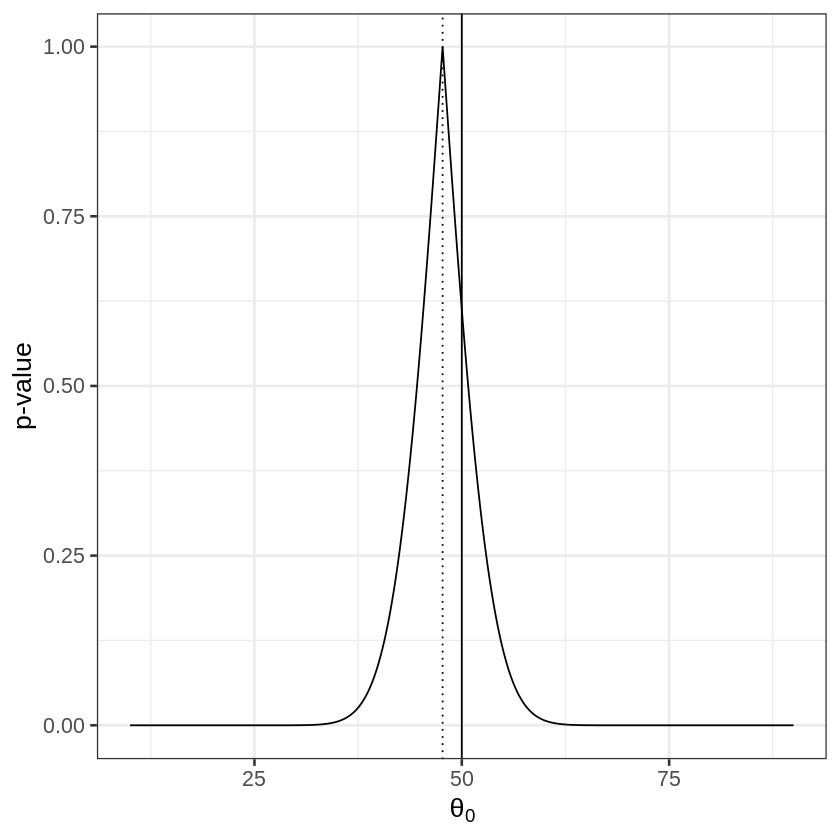

In [16]:
n <- 100                       # the sample size
hyp <- seq(10, 90, by = 0.01)  # hypothesis values to search over

# draw data from population distribution
x <- rnorm(n, mean = 50, sd = 40)

# calculate sample mean and estimate sampling variance
xbar <- mean(x)
sampling_variance <- sd(x) / sqrt(n)


df <- data.frame(
  hyp = hyp,
  p = 2 * (1 - pnorm(abs(xbar - hyp)/sampling_variance))
)


ggplot(df) +
    aes(hyp, p) + 
    geom_line() + 
    geom_vline(xintercept = xbar, linetype = "dotted") +
    geom_vline(xintercept = 50) +
    theme_bw(base_size = 16) +
    theme(legend.position = 'none') + 
    labs(
      x = expression(theta[0]),
      y = "p-value"
    )


## Confidence Intervals

A valid 95% confidence interval for parameter $\theta$ is a random interval $CI_{95}(\theta) = (X_{lower}, X_{upper})$ such that 

$$\Pr[\theta \in CI_{95}(\theta)] \geq 0.95$$

Based on the **central limit theorem**, we know that the limit distribution of the sample mean as $n \rightarrow \infty$ is Normal. We can use this fact to derive an approximate 95% confidence interval based on the Normal distribution: 

$$CI_{95} = (\widehat{\theta} - Z_{0.025} \cdot \widehat{SE}(\widehat{\theta}), \widehat{\theta} + Z_{0.975} \cdot \widehat{SE}(\widehat{\theta}))$$

where $\widehat{\theta} = \frac{1}{n}\sum_i X_i$ and $\widehat{SE}(\widehat{\theta}) = \sqrt{\frac{\sigma^2}{n}}$.

In the code that follows we're going to try to better understand this result through simulation. Run the code below to replicate the confidence interval plot from the slides.

**Exercises:**

1. Try modifying the simulation by changing the sample sizes, the number of simulations, or the underlying population distribution. What do you notice?

2. To make the plot a little nicer can you modify it so the estimates are in order from lowest to highest?



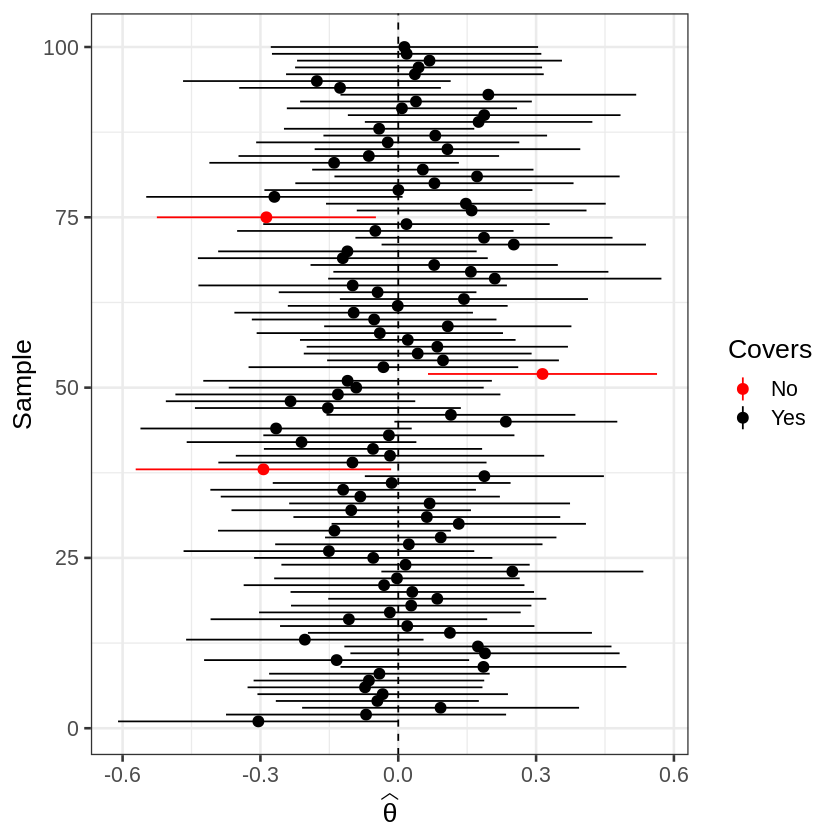

In [9]:
SIMS <- 100
n <- 50
truth <- 0

df <- tibble(
  sim = 1:SIMS,
  y = map(1:SIMS, ~rnorm(n)),
  mean = map_dbl(y, ~mean(.x)),
  sd = map_dbl(y, ~sd(.x)),
  upr = mean + 1.96 * sd / sqrt(n),
  lwr = mean - 1.96 * sd / sqrt(n),
  covers = as.numeric(lwr <= truth & truth <= upr)
)

ggplot(df) +
    aes(x = sim, ymin = lwr, ymax = upr, y = mean, color = factor(covers)) +
    geom_hline(yintercept = 0, linetype = "dashed") +
    geom_pointrange() +
    scale_color_manual(name = "Covers", labels = c("No", "Yes"), values = c("red", "black")) +
    theme_bw(base_size = 16) +
    labs(x = "Sample", 
         y = expression(widehat(theta))) +
    coord_flip()

In [10]:
empirical_coverage <- mean(df$covers)
print(empirical_coverage)

[1] 0.97
